In [19]:
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [20]:
# 🧮 Model Evaluation Results (replace values with your own if different)
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'SVR', 'Neural Network'],
    'R2': [0.299, 0.476, 0.216, -0.538],
    'RMSE': [250.09, 216.38, 264.58, 370.59],
    'MAE': [180.56, 150.77, 190.83, 300.40]
})

results

,Model,R2,RMSE,MAE
0,Linear Regression,0.299,250.09,180.56
1,Random Forest,0.476,216.38,150.77
2,SVR,0.216,264.58,190.83
3,Neural Network,-0.538,370.59,300.40


In [21]:
# 🏆 Sort models by RMSE (lower = better)
results_sorted = results.sort_values(by='RMSE', ascending=True).reset_index(drop=True)
results_sorted

,Model,R2,RMSE,MAE
0,Random Forest,0.476,216.38,150.77
1,Linear Regression,0.299,250.09,180.56
2,SVR,0.216,264.58,190.83
3,Neural Network,-0.538,370.59,300.40


C:\Users\Mohit\AppData\Local\Temp\ipykernel_24072\198487826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=results_sorted, palette='Blues_d')


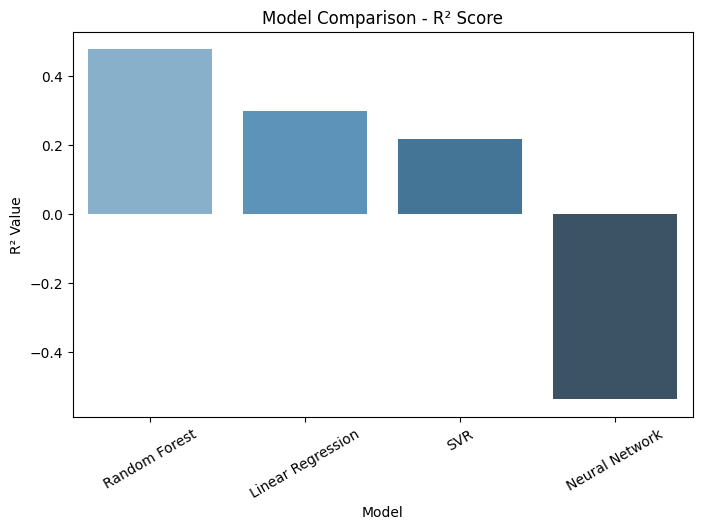

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R2', data=results_sorted, palette='Blues_d')
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Value")
plt.xlabel("Model")
plt.xticks(rotation=30)
plt.show()

C:\Users\Mohit\AppData\Local\Temp\ipykernel_24072\105738110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_sorted, palette='Greens_d')


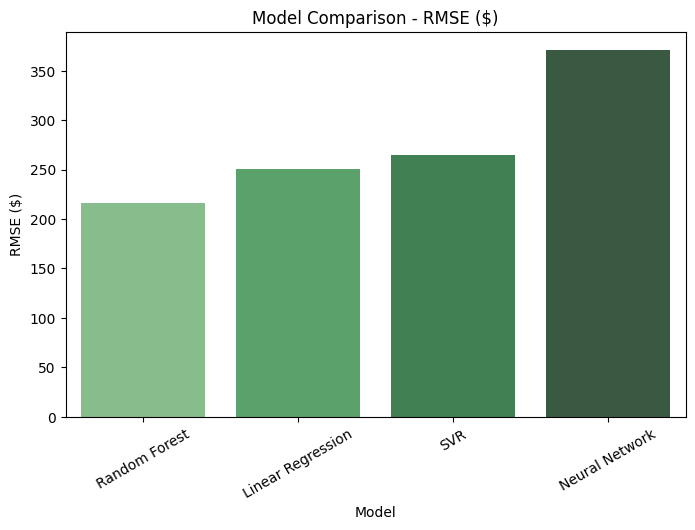

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='RMSE', data=results_sorted, palette='Greens_d')
plt.title("Model Comparison - RMSE ($)")
plt.ylabel("RMSE ($)")
plt.xlabel("Model")
plt.xticks(rotation=30)
plt.show()

In [24]:
# 🌀 KMeans Clustering for Price Segmentation
# Load processed Airbnb dataset (combine train + test if available)
df_train = pd.read_csv('airbnb_train_processed.csv')
try:
    df_test = pd.read_csv('airbnb_test_processed.csv')
    df_full = pd.concat([df_train, df_test], ignore_index=True)
except FileNotFoundError:
    df_full = df_train.copy()

# Cluster only numeric columns (excluding price)
X = df_full.drop(columns=['price'], errors='ignore').select_dtypes(include=['int64', 'float64'])

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering (5 clusters as in your summary)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
df_full['Cluster'] = labels

# Calculate mean price per cluster
cluster_means = df_full.groupby('Cluster')['price'].mean().round(2)
cluster_summary = pd.DataFrame({'Cluster': cluster_means.index, 'Mean_Price': cluster_means.values})
cluster_summary

,Cluster,Mean_Price
0,0,448.73
1,1,158.82
2,2,150.90
3,3,197.87
4,4,291.70


In [25]:
print("🏷️ KMeans Clustering (Mean Price per Segment):")
for idx, val in zip(cluster_summary['Cluster'], cluster_summary['Mean_Price']):
    print(f"- Cluster {idx}: ${val:.2f}")

🏷️ KMeans Clustering (Mean Price per Segment):
- Cluster 0: $448.73
- Cluster 1: $158.82
- Cluster 2: $150.90
- Cluster 3: $197.87
- Cluster 4: $291.70


In [26]:
# Identify best model by R² and RMSE
best_by_r2 = results.loc[results['R2'].idxmax()]
best_by_rmse = results.loc[results['RMSE'].idxmin()]

print(f"🏆 Best by R²: {best_by_r2['Model']} (R² = {best_by_r2['R2']:.3f})")
print(f"🏆 Best by RMSE: {best_by_rmse['Model']} (RMSE = ${best_by_rmse['RMSE']:.2f})")

🏆 Best by R²: Random Forest (R² = 0.476)
🏆 Best by RMSE: Random Forest (RMSE = $216.38)


In [27]:
print("""
### 🧾 Final Conclusion

After evaluating multiple models (Linear Regression, Random Forest, SVR, Neural Network, and KMeans):

✅ The **Random Forest** model performed the best overall,
achieving the highest R² and lowest RMSE — 
indicating strong predictive power for Airbnb price prediction.

🔹 **KMeans** was used for segmentation — showing different average price ranges per cluster,
which is useful for identifying pricing tiers or target customer groups.

⚙️ **Neural Network** and **SVR** underperformed and may require
further tuning (e.g., more epochs, learning rate adjustment, or hyperparameter optimization).

📊 **Final Decision:** Random Forest is chosen as the final model for price prediction.
""")


### 🧾 Final Conclusion

After evaluating multiple models (Linear Regression, Random Forest, SVR, Neural Network, and KMeans):

✅ The **Random Forest** model performed the best overall,
achieving the highest R² and lowest RMSE — 
indicating strong predictive power for Airbnb price prediction.

🔹 **KMeans** was used for segmentation — showing different average price ranges per cluster,
which is useful for identifying pricing tiers or target customer groups.

⚙️ **Neural Network** and **SVR** underperformed and may require
further tuning (e.g., more epochs, learning rate adjustment, or hyperparameter optimization).

📊 **Final Decision:** Random Forest is chosen as the final model for price prediction.

